# Final project: Chen Guan-Yan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig

## Set marix

In [7]:
# Set parameters



# Asexual growth rate within stage X
G1 = 1.8
G2 = 1.22
G3 = 1.18
# Mortality rate within stage X
m1 = 0.5
m2 = 0.2
m3 = 0.1
# Proportion of fusion from stage Xj to Xi 
Fu21 = 0.15
Fu31 = 0.1
Fu32 = 0.05
# Proportion of fission from stage Xj to Xi
Fi12 = 0.05
Fi13 = 0.1
Fi23 = 0.15
# Reproductive contribution from adult
R2 = 0.04
R3 = 0.06
#Juvenile survival rate to adult stage
S21 = 0.15
S31 = 0.15


# Leslie matrix
mx_L = np.array([
    [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
    [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
    [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
])




In [3]:
# define function adjusting Fu Fi and calculate matrix

def lamda_fu(Fu):
    
    Fi12 = 0.05
    Fi13 = 0.1
    Fi23 = 0.15

    # Change fusion rate 
    Fu21 = Fu+0.15
    Fu31 = Fu+0.1
    Fu32 = Fu+0.05

    # Leslie matrix
    mx_L = np.array([
        [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
        [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
        [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
    ])

    # Calculate eigenvector and eigenvalue
    w,v = eig(mx_L) 
    w_abs = abs(w) 
    order = np.argsort(w_abs) # ranking array by index
    order_index = order[2] # find the largest number by index
    lamda = w[order_index] # set largest value as lamda

    return lamda


def lamda_fi(Fi):
    
    Fu21 = 0.15
    Fu31 = 0.1
    Fu32 = 0.05

    # Change fission rate
    Fi12 = Fi+0.05
    Fi13 = Fi+0.1
    Fi23 = Fi+0.15

    # Leslie matrix
    mx_L = np.array([
        [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
        [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
        [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
    ])

    # Calculate eigenvector and eigenvalue
    w,v = eig(mx_L) 
    w_abs = abs(w) 
    order = np.argsort(w_abs) # ranking array by index
    order_index = order[2] # find the largest number by index
    lamda = w[order_index] # set largest value as lamda

    return lamda


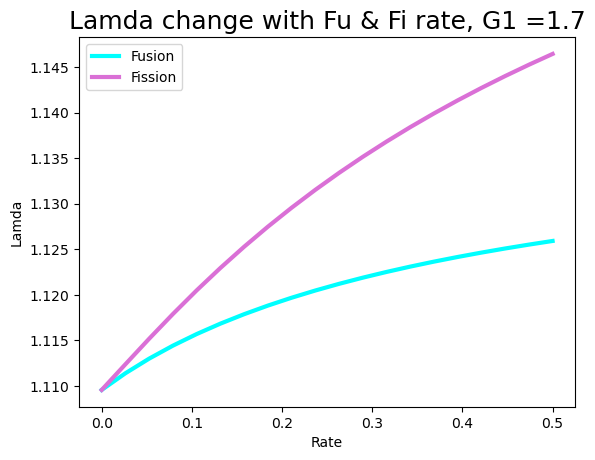

In [4]:
# plot fusion rate change with lamda

# set plot steps and changing rate
start = 0
stop = 0.5 # Fu or Fi rate end at +0.5
steps = 20

adjust_vals = np.linspace(start, stop, steps)
size = len(adjust_vals)
Lamda_fu = np.zeros(size)
Lamda_fi = np.zeros(size)


for i in range(0,size):
    Lamda_fu[i] = lamda_fu(adjust_vals[i])

for i in range(0,size):
    Lamda_fi[i] = lamda_fi(adjust_vals[i])

plt.plot(adjust_vals, Lamda_fu, color = 'cyan', linewidth=3.0,label= 'Fusion')
plt.plot(adjust_vals, Lamda_fi, color = 'orchid', linewidth=3.0, label= 'Fission')
plt.title("Lamda change with Fu & Fi rate, G1 ="+str(G1), fontsize=18)
plt.xlabel('Rate')
plt.ylabel('Lamda')
plt.legend(loc = "best")
#plt.savefig("./Figure/fig_Nofu_100.png", dpi=300, bbox_inches='tight');


In [5]:
# calculate stable stage distribution

def stable_fi(Fi):
    
    Fu21 = 0.15
    Fu31 = 0.1
    Fu32 = 0.05

    # Change fission rate
    Fi12 = Fi+0.05
    Fi13 = Fi+0.1
    Fi23 = Fi+0.15

    # Leslie matrix
    mx_L = np.array([
        [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
        [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
        [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
    ])

    # calculate stable distribution
    w,v = eig(mx_L) 
    w_abs = abs(w) 
    order = np.argsort(w_abs) # ranking array by index
    order_index = order[2] # find the largest number by index
    stable_dist = abs(v[:,order_index]) # get stable distribution from largest lamda
    total = sum(stable_dist)
    
    return stable_dist / total

def stable_fu(Fu):
    
    Fi12 = 0.05
    Fi13 = 0.1
    Fi23 = 0.15

    # change fusion rate
    Fu21 = Fu+0.15
    Fu31 = Fu+0.1
    Fu32 = Fu+0.05

    # Leslie matrix
    mx_L = np.array([
        [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
        [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
        [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
    ])

    # calculate stable distribution
    w,v = eig(mx_L) 
    w_abs = abs(w) 
    order = np.argsort(w_abs) # ranking array by index
    order_index = order[2] # find the largest number by index
    stable_dist = abs(v[:,order_index]) # get stable distribution from largest lamda
    total = sum(stable_dist)
    
    return stable_dist / total


# Conduct the functions and save the results into matrix

adjust_vals = np.linspace(start, stop, steps)
size = len(adjust_vals)
Stable_fu = np.zeros(shape=(size,3)) # create empty matrix for data storage
Stable_fi = np.zeros(shape=(size,3)) # create empty matrix for data storage


for i in range(0,size):
    Stable_fu[i,:] = stable_fu(adjust_vals[i])

for i in range(0,size):
    Stable_fi[i,:] = stable_fi(adjust_vals[i])




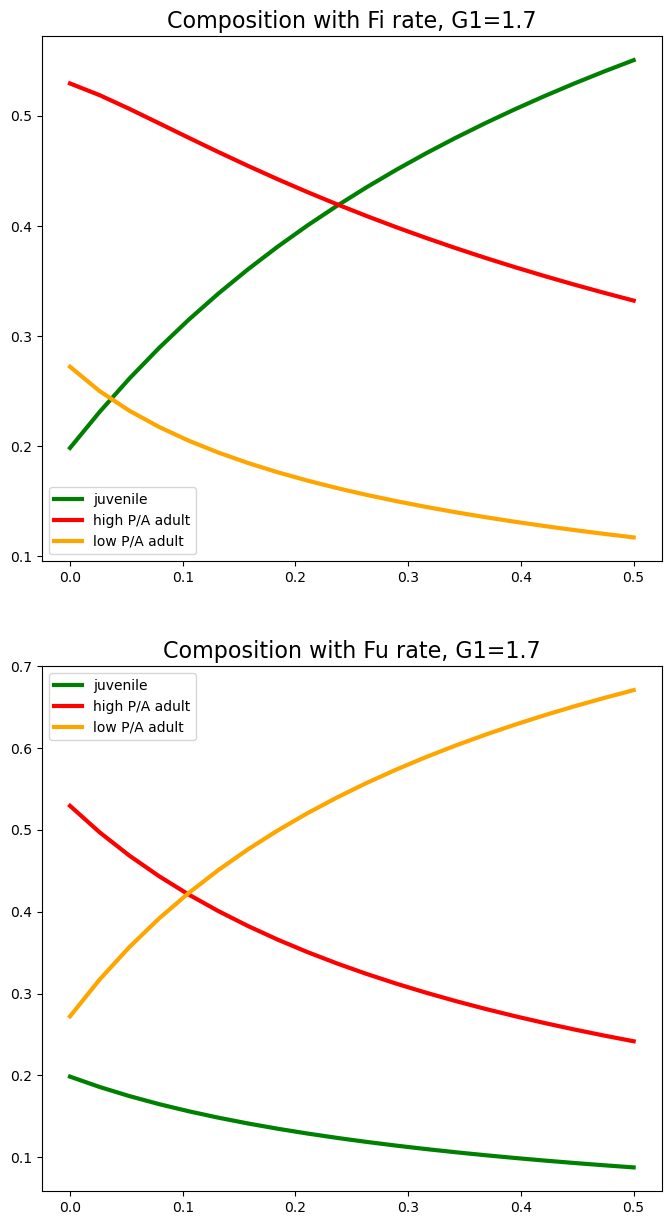

In [6]:
# Annotate and tidy the plot.
fig, ax = plt.subplots(2,1, figsize=(8,15))
#fig.suptitle("Composition with Fu and Fi rate", fontsize=18)
FS = 16


ax[0].plot(adjust_vals, Stable_fi[:,0], color = 'green', linewidth=3.0,label= 'juvenile')
ax[0].plot(adjust_vals, Stable_fi[:,1], color = 'red', linewidth=3.0,label= 'high P/A adult')
ax[0].plot(adjust_vals, Stable_fi[:,2], color = 'orange', linewidth=3.0,label= 'low P/A adult')
ax[0].set_title('Composition with Fi rate, G1='+str(G1), fontsize=FS)
ax[0].legend(loc = "best")


ax[1].plot(adjust_vals, Stable_fu[:,0], color = 'green', linewidth=3.0,label= 'juvenile')
ax[1].plot(adjust_vals, Stable_fu[:,1], color = 'red', linewidth=3.0,label= 'high P/A adult')
ax[1].plot(adjust_vals, Stable_fu[:,2], color = 'orange', linewidth=3.0,label= 'low P/A adult')
ax[1].set_title("Composition with Fu rate, G1="+str(G1), fontsize=FS)
ax[1].legend(loc = "best")


## Calculate matrix for time series plot

## Which composition duplicate themselve faster?

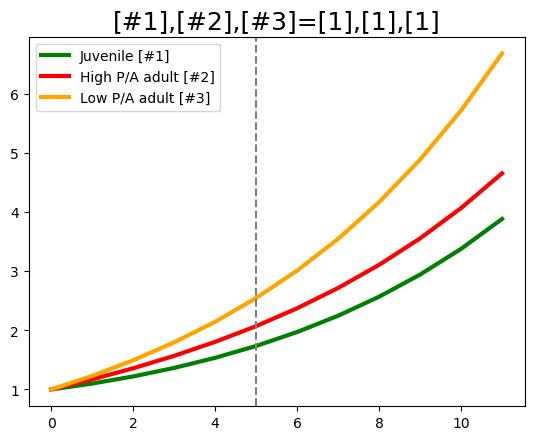

In [20]:

# Asexual growth rate within stage X
G1 = 1.8
G2 = 1.22
G3 = 1.18
# Mortality rate within stage X
m1 = 0.5
m2 = 0.2
m3 = 0.1
# Proportion of fusion from stage Xj to Xi 
Fu21 = 0.15
Fu31 = 0.1
Fu32 = 0.05
# Proportion of fission from stage Xj to Xi
Fi12 = 0.05
Fi13 = 0.1
Fi23 = 0.15
# Reproductive contribution from adult
R2 = 0.04
R3 = 0.06
#Juvenile survival rate to adult stage
S21 = 0.15
S31 = 0.15

mx_L = np.array([
    [G1-m1-Fu31-Fu21-S21-S31, Fi12+R2, Fi13+R3],
    [S21+Fu21, G2-m2-Fi12-Fu32, Fi23],
    [S31+Fu31, Fu32, G3-m3-Fi13-Fi23],
])

# Initial condition
X1 = 1 # Juvenile
X2 = 1 # high P/A value adult
X3 = 1 # low P/A value adult

# Initial condition matrix
mx_X0 = np.array([
    [X1], [X2], [X3]
])

# set steps
start = 0
stop = 12
time_steps = 12 #no. of time steps

condition = False
D_time = None

mx_Xt = np.zeros(shape=(3,stop)) # create empty matrix for data storage
mx_Xt[:,[0]] = mx_X0  # set initial matrix

for i in range(start+1,stop):
    mx_Xt[:,[i]] =  mx_L.dot(mx_Xt[:,[i-1]]) # calculate leslie matrix and store in mx_Xt
    for j in range(0,3):
        if(mx_Xt[j,i] < 0):
            mx_Xt[j,i] = 0 # remove negative value as zero
    if(condition == False):
        if(sum(mx_Xt[:,i]) >= sum(mx_Xt[:,0])*2):
            D_time = i
            condition = True
    
        

# set X axis
time_points = np.linspace(start, stop-1, time_steps, dtype=int)

# put matrix data into array
X1_array = mx_Xt[0,:]
X2_array = mx_Xt[1,:]
X3_array = mx_Xt[2,:]

title = ','.join(str(x) for x in mx_X0) # set the title about initial condition

plt.plot(time_points, X1_array, color = 'green', linewidth=3.0,label= 'Juvenile [#1]')
plt.plot(time_points, X2_array, color = 'red', linewidth=3.0, label= 'High P/A adult [#2]')
plt.plot(time_points, X3_array, color = 'orange', linewidth=3.0, label= 'Low P/A adult [#3]')
plt.axvline(x=D_time, linestyle='--', color='grey')
plt.title("[#1],[#2],[#3]=" +title, fontsize=18)
plt.legend(loc = "best");
#plt.savefig("./Figure/fig_Nofu_100.png", dpi=300, bbox_inches='tight');            

